In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import  MinMaxScaler

In [ ]:
stock_data = pd.read_csv ('/content/GOOG.csv', date_parser= True)
data_train = stock_data[0:1862].copy()
data_test = stock_data[1862:].copy()
train_data = data_train.drop(['Date', 'Adj Close'], axis = 1)

minmaxscaler

In [ ]:
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
train_data


array([[0.02546763, 0.02753707, 0.02909285, 0.02942896, 0.58566104],
       [0.03054502, 0.03125952, 0.03354367, 0.03314949, 0.30879981],
       [0.03239772, 0.03111705, 0.03431841, 0.03231186, 0.13128503],
       ...,
       [0.92247394, 0.91469444, 0.91011219, 0.90157789, 0.1557151 ],
       [0.92215059, 0.91021532, 0.9167247 , 0.91338478, 0.11871125],
       [0.93818577, 0.9329652 , 0.93791412, 0.94133664, 0.11850527]])

In [ ]:
X_train = []
Y_train = []
for i in range (30, train_data.shape[0]):
    X_train.append(train_data[i-30: i]) 
    Y_train.append(train_data[i,0])
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [ ]:
#BUILDING THE LSTM
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout 

model = Sequential()
model.add(LSTM(units=60, activation= "tanh", return_sequences= True, input_shape = (X_train.shape[1] , 5))) #THE 2 INPUT PARAMETERS, how many units/layers you want in LSTM network
model.add(Dropout(0.2)) 

model.add(LSTM(units=70, activation= "tanh", return_sequences= True, input_shape = (X_train.shape[1] , 5))) #THE 2 INPUT PARAMETERS, how many units/layers you want in LSTM network
model.add(Dropout(0.2)) 

model.add(LSTM(units=80, activation= "tanh", return_sequences= True, input_shape = (X_train.shape[1] , 5))) 
model.add(Dropout(0.2)) 

model.add(LSTM(units=100, activation= "tanh"))
model.add(Dropout(0.3)) 
model.add(Dense(units = 1))

In [ ]:
model.summary()

Model: "sequential_85"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_233 (LSTM)             (None, 30, 60)            15840     
                                                                 
 dropout_283 (Dropout)       (None, 30, 60)            0         
                                                                 
 lstm_234 (LSTM)             (None, 30, 70)            36680     
                                                                 
 dropout_284 (Dropout)       (None, 30, 70)            0         
                                                                 
 lstm_235 (LSTM)             (None, 30, 80)            48320     
                                                                 
 dropout_285 (Dropout)       (None, 30, 80)            0         
                                                                 
 lstm_236 (LSTM)             (None, 100)             

In [ ]:
model.compile(optimizer= "adam", loss = "mean_squared_error") 

In [ ]:
history = model.fit(X_train, Y_train, epochs=10, batch_size = 32)


Epoch 1/10
58/58 [==============================] - 6s 12ms/step - loss: 0.0102
Epoch 2/10
58/58 [==============================] - 1s 12ms/step - loss: 0.0020
Epoch 3/10
58/58 [==============================] - 1s 12ms/step - loss: 0.0021
Epoch 4/10
58/58 [==============================] - 1s 12ms/step - loss: 0.0018
Epoch 5/10
58/58 [==============================] - 1s 12ms/step - loss: 0.0017
Epoch 6/10
58/58 [==============================] - 1s 12ms/step - loss: 0.0017
Epoch 7/10
58/58 [==============================] - 1s 12ms/step - loss: 0.0014
Epoch 8/10
58/58 [==============================] - 1s 12ms/step - loss: 0.0019
Epoch 9/10
58/58 [==============================] - 1s 12ms/step - loss: 0.0019
Epoch 10/10
58/58 [==============================] - 1s 12ms/step - loss: 0.0014


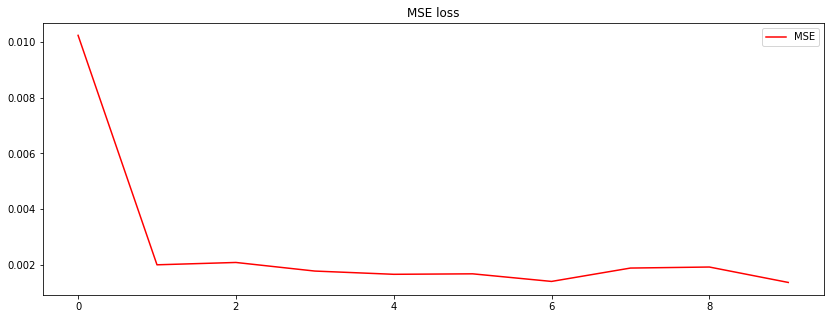

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(history.history['loss'], color = 'red', label = 'MSE')

plt.title('MSE loss')

plt.legend()
plt.show()

In [ ]:
past_30_days = data_train.tail(30)
df= past_30_days.append (data_test, ignore_index= True)
df = df.drop (['Date', 'Adj Close'], axis =1)

In [ ]:
inputs = scaler.transform(df)


In [ ]:
X_test = []
y_test = []

for i in range (30, inputs.shape[0]):
  X_test.append (inputs[i-30:i])
  y_test.append (inputs[i,0]) 
X_test, y_test = np.array (X_test), np.array(y_test)


In [ ]:
y_pred= model.predict (X_test)

In [ ]:
error = y_pred - y_test
mse = np.square(error).mean()
mse

0.01820755385997482

In [ ]:
scaler.scale_

array([5.21639042e-04, 5.10787860e-04, 5.21905697e-04, 5.15812629e-04,
       8.95543293e-08])

In [ ]:
scale = 1/5.21639042e-04
scale

1917.0344232017817

In [ ]:
y_pred = y_pred*scale
y_test = y_test*scale

Visualization

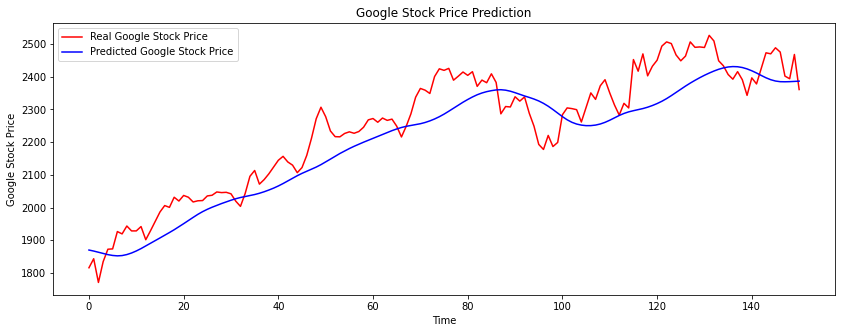

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()



```
# Second lstm model
```



In [ ]:
#BUILDING THE LSTM
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout 

model = Sequential()
model.add(LSTM(units=70, activation= "tanh", return_sequences= True, input_shape = (X_train.shape[1] , 5))) #THE 2 INPUT PARAMETERS, how many units/layers you want in LSTM network
model.add(Dropout(0.2)) 

model.add(LSTM(units=80, activation= "tanh", return_sequences= True, input_shape = (X_train.shape[1] , 5))) 
model.add(Dropout(0.2)) 

model.add(LSTM(units=90, activation= "tanh"))
model.add(Dropout(0.2)) 
model.add(Dense(units = 1))

In [ ]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_23 (LSTM)              (None, 30, 70)            21280     
                                                                 
 dropout_49 (Dropout)        (None, 30, 70)            0         
                                                                 
 lstm_24 (LSTM)              (None, 30, 80)            48320     
                                                                 
 dropout_50 (Dropout)        (None, 30, 80)            0         
                                                                 
 lstm_25 (LSTM)              (None, 90)                61560     
                                                                 
 dropout_51 (Dropout)        (None, 90)                0         
                                                                 
 dense_19 (Dense)            (None, 1)               

In [ ]:
model.compile(optimizer= "adam", loss = "mean_squared_error") 

In [ ]:
history = model.fit(X_train, Y_train, epochs=10, batch_size = 32)


Epoch 1/10
58/58 [==============================] - 4s 10ms/step - loss: 0.0072
Epoch 2/10
58/58 [==============================] - 1s 9ms/step - loss: 0.0017
Epoch 3/10
58/58 [==============================] - 1s 10ms/step - loss: 0.0013
Epoch 4/10
58/58 [==============================] - 1s 11ms/step - loss: 0.0016
Epoch 5/10
58/58 [==============================] - 1s 10ms/step - loss: 0.0011
Epoch 6/10
58/58 [==============================] - 1s 9ms/step - loss: 0.0012
Epoch 7/10
58/58 [==============================] - 1s 9ms/step - loss: 9.9586e-04
Epoch 8/10
58/58 [==============================] - 1s 9ms/step - loss: 0.0010
Epoch 9/10
58/58 [==============================] - 1s 9ms/step - loss: 0.0015
Epoch 10/10
58/58 [==============================] - 1s 9ms/step - loss: 0.0010


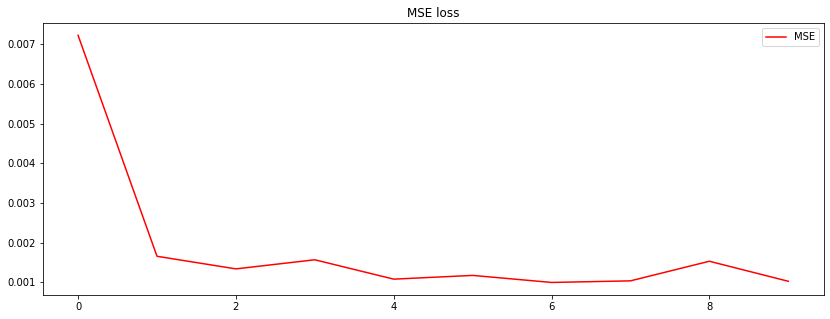

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(history.history['loss'], color = 'red', label = 'MSE')

plt.title('MSE loss')

plt.legend()
plt.show()

In [ ]:
past_30_days = data_train.tail(30)
df= past_30_days.append (data_test, ignore_index= True)
df = df.drop (['Date', 'Adj Close'], axis =1)

In [ ]:
inputs = scaler.transform(df)


In [ ]:
X_test = []
y_test = []

for i in range (30, inputs.shape[0]):
  X_test.append (inputs[i-30:i])
  y_test.append (inputs[i,0]) 
X_test, y_test = np.array (X_test), np.array(y_test)


In [ ]:
y_pred= model.predict (X_test)

In [ ]:
error = y_pred - y_test
mse = np.square(error).mean()
mse

0.01729280954608531

In [ ]:
scaler.scale_

array([5.21639042e-04, 5.10787860e-04, 5.21905697e-04, 5.15812629e-04,
       8.95543293e-08])

In [ ]:
scale = 1/5.21639042e-04
scale

1917.0344232017817

In [ ]:
y_pred = y_pred*scale
y_test = y_test*scale

Visualization

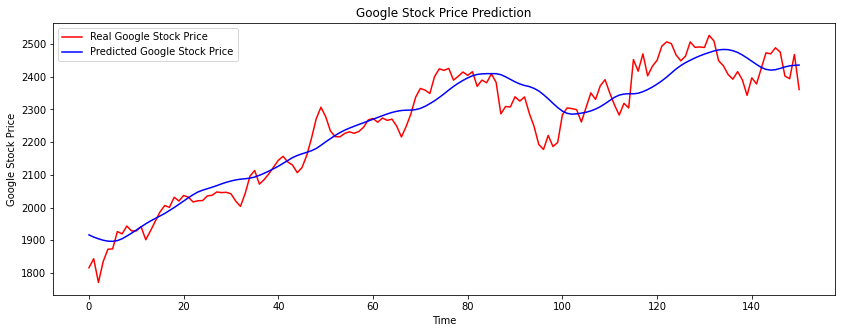

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()



```
# third lstm model
```



In [ ]:
#BUILDING THE LSTM
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout 

model = Sequential()
model.add(LSTM(units=70, activation= "tanh", return_sequences= True, input_shape = (X_train.shape[1] , 5))) #THE 2 INPUT PARAMETERS, how many units/layers you want in LSTM network
model.add(Dropout(0.2)) 

model.add(LSTM(units=100, activation= "tanh"))
model.add(Dropout(0.15)) 
model.add(Dense(units = 1))

In [ ]:
model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_48 (LSTM)              (None, 30, 70)            21280     
                                                                 
 dropout_74 (Dropout)        (None, 30, 70)            0         
                                                                 
 lstm_49 (LSTM)              (None, 100)               68400     
                                                                 
 dropout_75 (Dropout)        (None, 100)               0         
                                                                 
 dense_31 (Dense)            (None, 1)                 101       
                                                                 
Total params: 89,781
Trainable params: 89,781
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer= "adam", loss = "mean_squared_error") 

In [ ]:
history = model.fit(X_train, Y_train, epochs=10, batch_size = 32)


Epoch 1/10
58/58 [==============================] - 3s 7ms/step - loss: 0.0080
Epoch 2/10
58/58 [==============================] - 0s 7ms/step - loss: 0.0011
Epoch 3/10
58/58 [==============================] - 0s 7ms/step - loss: 9.0262e-04
Epoch 4/10
58/58 [==============================] - 0s 7ms/step - loss: 8.6747e-04
Epoch 5/10
58/58 [==============================] - 0s 7ms/step - loss: 7.9073e-04
Epoch 6/10
58/58 [==============================] - 0s 7ms/step - loss: 7.6980e-04
Epoch 7/10
58/58 [==============================] - 0s 7ms/step - loss: 7.5943e-04
Epoch 8/10
58/58 [==============================] - 0s 7ms/step - loss: 8.2607e-04
Epoch 9/10
58/58 [==============================] - 0s 8ms/step - loss: 8.2038e-04
Epoch 10/10
58/58 [==============================] - 0s 7ms/step - loss: 7.1219e-04


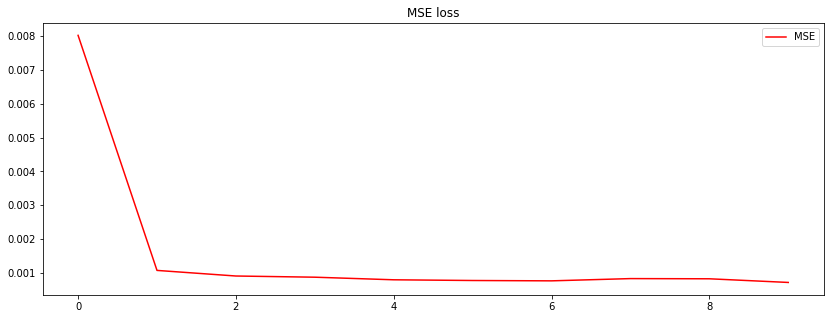

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(history.history['loss'], color = 'red', label = 'MSE')

plt.title('MSE loss')

plt.legend()
plt.show()

In [ ]:
past_30_days = data_train.tail(30)
df= past_30_days.append (data_test, ignore_index= True)
df = df.drop (['Date', 'Adj Close'], axis =1)

In [ ]:
inputs = scaler.transform(df)


In [ ]:
X_test = []
y_test = []

for i in range (30, inputs.shape[0]):
  X_test.append (inputs[i-30:i])
  y_test.append (inputs[i,0]) 
X_test, y_test = np.array (X_test), np.array(y_test)


In [ ]:
y_pred= model.predict (X_test)

In [ ]:
error = y_pred - y_test
mse = np.square(error).mean()
mse

0.018145940005061728

In [ ]:
scaler.scale_

array([5.21639042e-04, 5.10787860e-04, 5.21905697e-04, 5.15812629e-04,
       8.95543293e-08])

In [ ]:
scale = 1/5.21639042e-04
scale

1917.0344232017817

In [ ]:
y_pred = y_pred*scale
y_test = y_test*scale

Visualization

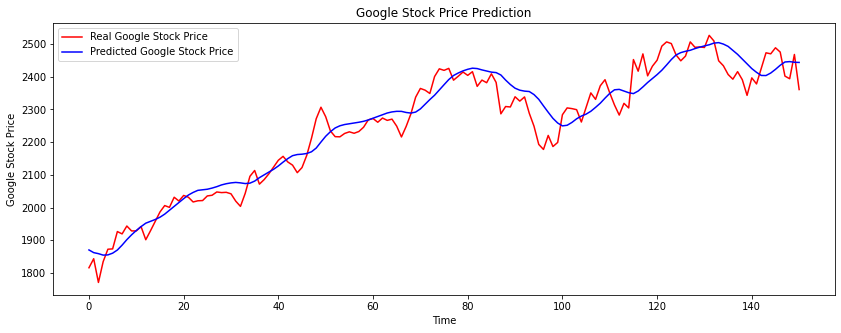

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

GRU

In [ ]:
#BUILDING THE GRU
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout 

model = Sequential()
model.add(GRU(units=60, activation= "tanh", return_sequences= True, input_shape = (X_train.shape[1] , 5))) #THE 2 INPUT PARAMETERS, how many units/layers you want in LSTM network
model.add(Dropout(0.2)) 

model.add(GRU(units=70, activation= "tanh", return_sequences= True, input_shape = (X_train.shape[1] , 5))) #THE 2 INPUT PARAMETERS, how many units/layers you want in LSTM network
model.add(Dropout(0.2)) 

model.add(GRU(units=80, activation= "tanh", return_sequences= True, input_shape = (X_train.shape[1] , 5))) 
model.add(Dropout(0.2)) 

model.add(GRU(units=100, activation= "tanh"))
model.add(Dropout(0.2)) 
model.add(Dense(units = 1))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 30, 60)            12060     
                                                                 
 dropout_12 (Dropout)        (None, 30, 60)            0         
                                                                 
 gru_5 (GRU)                 (None, 30, 70)            27720     
                                                                 
 dropout_13 (Dropout)        (None, 30, 70)            0         
                                                                 
 gru_6 (GRU)                 (None, 30, 80)            36480     
                                                                 
 dropout_14 (Dropout)        (None, 30, 80)            0         
                                                                 
 gru_7 (GRU)                 (None, 100)              

In [ ]:
model.compile(optimizer= "adam", loss = "mean_squared_error") 

In [ ]:
X_test = []
y_test = []

for i in range (30, inputs.shape[0]):
  X_test.append (inputs[i-30:i])
  y_test.append (inputs[i,0]) 
X_test, y_test = np.array (X_test), np.array(y_test)


In [ ]:
history = model.fit(X_train, Y_train, epochs=10, batch_size = 32,validation_data=(X_test, y_test))


Epoch 1/10
58/58 [==============================] - 7s 30ms/step - loss: 0.0077 - val_loss: 0.0083
Epoch 2/10
58/58 [==============================] - 1s 11ms/step - loss: 0.0014 - val_loss: 0.0029
Epoch 3/10
58/58 [==============================] - 1s 11ms/step - loss: 0.0015 - val_loss: 0.0311
Epoch 4/10
58/58 [==============================] - 1s 11ms/step - loss: 0.0016 - val_loss: 0.0017
Epoch 5/10
58/58 [==============================] - 1s 11ms/step - loss: 0.0012 - val_loss: 0.0068
Epoch 6/10
58/58 [==============================] - 1s 11ms/step - loss: 0.0012 - val_loss: 0.0034
Epoch 7/10
58/58 [==============================] - 1s 11ms/step - loss: 0.0010 - val_loss: 7.1694e-04
Epoch 8/10
58/58 [==============================] - 1s 11ms/step - loss: 0.0011 - val_loss: 6.9227e-04
Epoch 9/10
58/58 [==============================] - 1s 12ms/step - loss: 9.7986e-04 - val_loss: 0.0100
Epoch 10/10
58/58 [==============================] - 1s 11ms/step - loss: 0.0010 - val_loss: 6.38

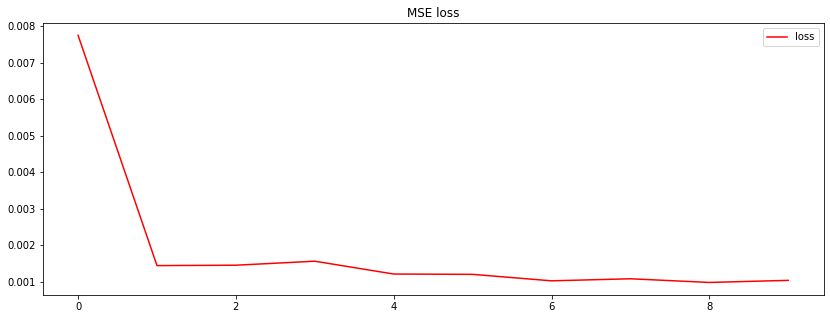

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(history.history['loss'], color = 'red', label = 'loss')
plt.title('MSE loss')

plt.legend()
plt.show()

In [ ]:
past_30_days = data_train.tail(30)
df= past_30_days.append (data_test, ignore_index= True)
df = df.drop (['Date', 'Adj Close'], axis =1)

In [ ]:
inputs = scaler.transform(df)


In [ ]:
y_pred= model.predict (X_test)

In [ ]:
error = y_pred - y_test
mse = np.square(error).mean()
mse

0.018385780551238635

In [ ]:
scaler.scale_

array([5.21639042e-04, 5.10787860e-04, 5.21905697e-04, 5.15812629e-04,
       8.95543293e-08])

In [ ]:
scale = 1/5.21639042e-04
scale

1917.0344232017817

In [ ]:
y_pred = y_pred*scale
y_test = y_test*scale

Visualization

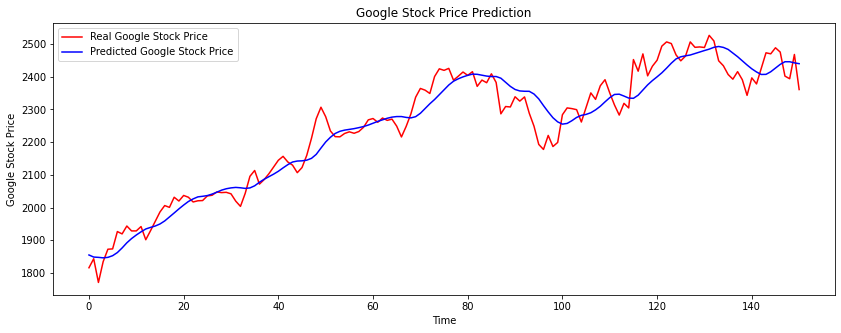

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

SECOND GRU

In [ ]:
#BUILDING THE LSTM
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout 

model = Sequential()
model.add(GRU(units=70, activation= "tanh", return_sequences= True, input_shape = (X_train.shape[1] , 5))) #THE 2 INPUT PARAMETERS, how many units/layers you want in LSTM network
model.add(Dropout(0.2)) 

model.add(GRU(units=80, activation= "tanh", return_sequences= True, input_shape = (X_train.shape[1] , 5))) 
model.add(Dropout(0.2)) 

model.add(GRU(units=100, activation= "tanh"))
model.add(Dropout(0.2)) 
model.add(Dense(units = 1))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_8 (GRU)                 (None, 30, 70)            16170     
                                                                 
 dropout_16 (Dropout)        (None, 30, 70)            0         
                                                                 
 gru_9 (GRU)                 (None, 30, 80)            36480     
                                                                 
 dropout_17 (Dropout)        (None, 30, 80)            0         
                                                                 
 gru_10 (GRU)                (None, 90)                46440     
                                                                 
 dropout_18 (Dropout)        (None, 90)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                

In [ ]:
model.compile(optimizer= "adam", loss = "mean_squared_error") 

In [ ]:
model.fit(X_train, Y_train, epochs=10, batch_size = 32)


Epoch 1/10
58/58 [==============================] - 5s 9ms/step - loss: 0.0073
Epoch 2/10
58/58 [==============================] - 1s 9ms/step - loss: 0.0015
Epoch 3/10
58/58 [==============================] - 0s 8ms/step - loss: 0.0012
Epoch 4/10
58/58 [==============================] - 1s 9ms/step - loss: 0.0011
Epoch 5/10
58/58 [==============================] - 1s 9ms/step - loss: 9.2178e-04
Epoch 6/10
58/58 [==============================] - 1s 9ms/step - loss: 9.5524e-04
Epoch 7/10
58/58 [==============================] - 0s 8ms/step - loss: 8.8737e-04
Epoch 8/10
58/58 [==============================] - 1s 9ms/step - loss: 9.5151e-04
Epoch 9/10
58/58 [==============================] - 0s 8ms/step - loss: 7.6355e-04
Epoch 10/10
58/58 [==============================] - 1s 9ms/step - loss: 7.8281e-04


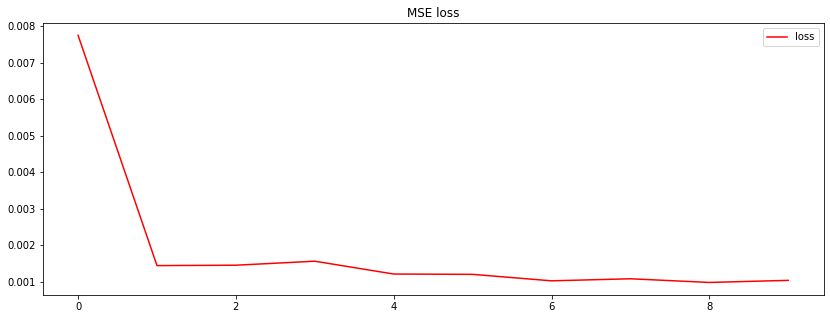

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(history.history['loss'], color = 'red', label = 'loss')
plt.title('MSE loss')

plt.legend()
plt.show()

In [ ]:
past_30_days = data_train.tail(30)
df= past_30_days.append (data_test, ignore_index= True)
df = df.drop (['Date', 'Adj Close'], axis =1)

In [ ]:
inputs = scaler.transform(df)


In [ ]:
X_test = []
y_test = []

for i in range (30, inputs.shape[0]):
  X_test.append (inputs[i-30:i])
  y_test.append (inputs[i,0]) 
X_test, y_test = np.array (X_test), np.array(y_test)


In [ ]:
y_pred= model.predict (X_test)

In [ ]:
error = y_pred - y_test
mse = np.square(error).mean()
mse

0.018775458483968596

In [ ]:
scaler.scale_

array([5.21639042e-04, 5.10787860e-04, 5.21905697e-04, 5.15812629e-04,
       8.95543293e-08])

In [ ]:
scale = 1/5.21639042e-04
scale

1917.0344232017817

In [ ]:
y_pred = y_pred*scale
y_test = y_test*scale

Visualization

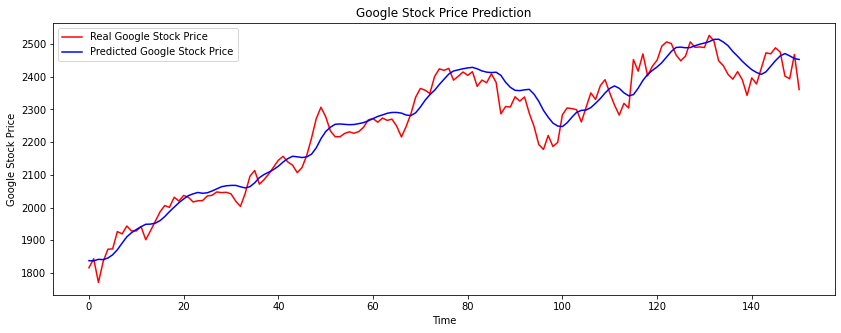

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

THIRD GRU 

In [ ]:
#BUILDING THE GRU
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout 

model = Sequential()
model.add(GRU(units=70, activation= "tanh", return_sequences= True, input_shape = (X_train.shape[1] , 5))) #THE 2 INPUT PARAMETERS, how many units/layers you want in LSTM network
model.add(Dropout(0.2)) 


model.add(GRU(units=130, activation= "tanh"))
model.add(Dropout(0.2)) 
model.add(Dense(units = 1))

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_24 (GRU)                (None, 30, 70)            16170     
                                                                 
 dropout_32 (Dropout)        (None, 30, 70)            0         
                                                                 
 gru_25 (GRU)                (None, 130)               78780     
                                                                 
 dropout_33 (Dropout)        (None, 130)               0         
                                                                 
 dense_13 (Dense)            (None, 1)                 131       
                                                                 
Total params: 95,081
Trainable params: 95,081
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer= "adam", loss = "mean_squared_error") 

In [ ]:
model.fit(X_train, Y_train, epochs=10, batch_size = 32)


Epoch 1/10
58/58 [==============================] - 3s 7ms/step - loss: 0.0073
Epoch 2/10
58/58 [==============================] - 0s 6ms/step - loss: 0.0012
Epoch 3/10
58/58 [==============================] - 0s 7ms/step - loss: 9.5925e-04
Epoch 4/10
58/58 [==============================] - 0s 7ms/step - loss: 9.9256e-04
Epoch 5/10
58/58 [==============================] - 0s 7ms/step - loss: 7.3704e-04
Epoch 6/10
58/58 [==============================] - 0s 7ms/step - loss: 7.6779e-04
Epoch 7/10
58/58 [==============================] - 0s 7ms/step - loss: 6.5046e-04
Epoch 8/10
58/58 [==============================] - 0s 7ms/step - loss: 6.5608e-04
Epoch 9/10
58/58 [==============================] - 0s 7ms/step - loss: 6.2304e-04
Epoch 10/10
58/58 [==============================] - 0s 6ms/step - loss: 5.9065e-04


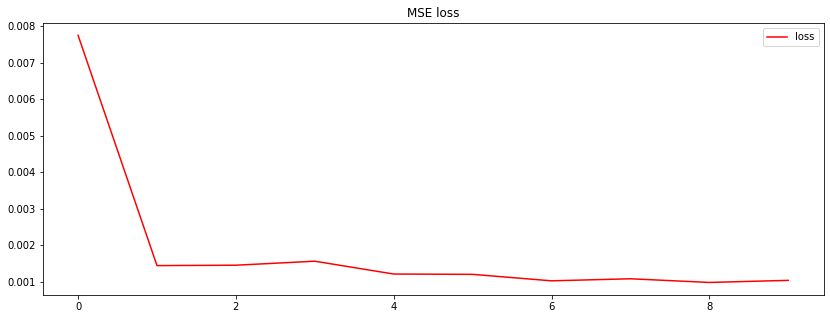

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(history.history['loss'], color = 'red', label = 'loss')
plt.title('MSE loss')

plt.legend()
plt.show()

In [ ]:
past_30_days = data_train.tail(30)
df= past_30_days.append (data_test, ignore_index= True)
df = df.drop (['Date', 'Adj Close'], axis =1)

In [ ]:
inputs = scaler.transform(df)


In [ ]:
X_test = []
y_test = []

for i in range (30, inputs.shape[0]):
  X_test.append (inputs[i-30:i])
  y_test.append (inputs[i,0]) 
X_test, y_test = np.array (X_test), np.array(y_test)


In [ ]:
y_pred= model.predict (X_test)

In [ ]:
error = y_pred - y_test
mse = np.square(error).mean()
mse

0.018437519536963473

In [ ]:
scaler.scale_

array([5.21639042e-04, 5.10787860e-04, 5.21905697e-04, 5.15812629e-04,
       8.95543293e-08])

In [ ]:
scale = 1/5.21639042e-04
scale

1917.0344232017817

In [ ]:
y_pred = y_pred*scale
y_test = y_test*scale

Visualization

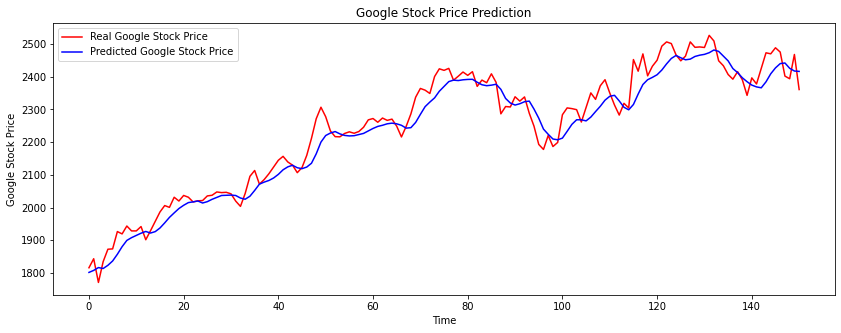

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()